In [111]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector,SelectFwe,f_regression,SelectKBest,SelectPercentile,SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV,StratifiedKFold,RepeatedKFold
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import time
import warnings
import pickle
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [112]:
df=pd.read_csv('intern_car_regg.csv')
df.head()

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,370 000 km,Mexaniki,Ön,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,168 636 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,120 873 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN
4,0,36000,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN


In [113]:
conversion_rates = {
    'EUR': 1.85, 
    'USD': 1.7,  
    'AZN': 1.0  
}

def convert_to_azn(price, currency):
    return price * conversion_rates[currency]

df['Qiymet_AZN'] = df.apply(lambda row: convert_to_azn(row['Qiymet'], row['Valyuta']), axis=1)

df.head()

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı,Qiymet_AZN
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,370 000 km,Mexaniki,Ön,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN,13500.00
1,1,23500,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN,39950.00
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,168 636 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN,33200.00
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,120 873 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN,17000.00
4,0,36000,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN,61200.00


In [114]:
df['Qiymet']=df['Qiymet_AZN'].astype(int)
df.drop(columns='Qiymet_AZN',inplace=True)
df.head()

,Avtosalon,Qiymet,Valyuta,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Vəziyyəti,Yeniləndi,Baxışların sayı,Extra,Etrafli,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı
0,0,13500,AZN,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,370 000 km,Mexaniki,Ön,Xeyr,"Vuruğu yoxdur, rənglənib",28.05.2023,267,"Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",Salam Barter mümkündür. 1.6 sadə mator mexanik...,2,Avropa,5,NaN
1,1,39950,USD,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,12410,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",TOYOTA CAROLLA 2023 ALIŞ. 2 İL 80.000 KM ZƏMAN...,1,Rəsmi diler,5,NaN
2,0,33200,AZN,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,168 636 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",28.05.2023,148,"Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",Yeni gelib bakida surlmuyb qiymet mawin yanind...,1,Avropa,7,NaN
3,0,17000,AZN,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,120 873 km,Avtomat,Ön,Xeyr,"Vuruğu yoxdur, rənglənməyib",25.05.2023,3358,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Maşın xanım tərəfindən idarə olunub,NaN,NaN,NaN,NaN
4,0,61200,USD,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,0 km,Avtomat,Ön,Bəli,"Vuruğu yoxdur, rənglənməyib",28.05.2023,16183,"Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",Rəsmi dilerdən 10 il və ya 160.000 km zəmanəti...,1,NaN,5,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Avtosalon                 10000 non-null  int64 
 1   Qiymet                    10000 non-null  int32 
 2   Valyuta                   10000 non-null  object
 3   Şəhər                     10000 non-null  object
 4   Marka                     10000 non-null  object
 5   Model                     10000 non-null  object
 6   Buraxılış ili             10000 non-null  int64 
 7   Ban növü                  10000 non-null  object
 8   Rəng                      10000 non-null  object
 9   Mühərrik                  10000 non-null  object
 10  Yürüş                     10000 non-null  object
 11  Sürətlər qutusu           10000 non-null  object
 12  Ötürücü                   10000 non-null  object
 13  Yeni                      10000 non-null  object
 14  Vəziyyəti              

In [116]:
df.drop(columns=['Baxışların sayı','Yeni',"Yeniləndi",'Etrafli',"Avtosalon","Sahiblər"],inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Qiymet                    10000 non-null  int32 
 1   Valyuta                   10000 non-null  object
 2   Şəhər                     10000 non-null  object
 3   Marka                     10000 non-null  object
 4   Model                     10000 non-null  object
 5   Buraxılış ili             10000 non-null  int64 
 6   Ban növü                  10000 non-null  object
 7   Rəng                      10000 non-null  object
 8   Mühərrik                  10000 non-null  object
 9   Yürüş                     10000 non-null  object
 10  Sürətlər qutusu           10000 non-null  object
 11  Ötürücü                   10000 non-null  object
 12  Vəziyyəti                 9972 non-null   object
 13  Extra                     9236 non-null   object
 14  Hansı bazar üçün yığılı

In [118]:
df.Qəzalı.isna().sum()

9968

In [119]:
df.drop(columns=['Qəzalı'],inplace=True)

In [120]:
df.drop(columns=['Hansı bazar üçün yığılıb'],inplace=True)

In [121]:
df.drop(columns=['Valyuta'],axis=1,inplace=True)
df['Yürüş'] = df['Yürüş'].str.replace(r'\D', '', regex=True)
df['Yürüş'] = df['Yürüş'].astype(int)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Qiymet           10000 non-null  int32 
 1   Şəhər            10000 non-null  object
 2   Marka            10000 non-null  object
 3   Model            10000 non-null  object
 4   Buraxılış ili    10000 non-null  int64 
 5   Ban növü         10000 non-null  object
 6   Rəng             10000 non-null  object
 7   Mühərrik         10000 non-null  object
 8   Yürüş            10000 non-null  int32 
 9   Sürətlər qutusu  10000 non-null  object
 10  Ötürücü          10000 non-null  object
 11  Vəziyyəti        9972 non-null   object
 12  Extra            9236 non-null   object
 13  Yerlərin sayı    6832 non-null   object
dtypes: int32(2), int64(1), object(11)
memory usage: 1015.8+ KB


In [123]:
df_split = df['Vəziyyəti'].str.split(',', expand=True)

In [124]:
df_split['Rənglənib']=df_split[1]
df_split['Vuruğu var']=df_split[0]
df_split.drop(columns=[0,1],inplace=True)

In [125]:
df_split = df_split.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_split = df_split.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)

In [126]:
df_split['Vuruğu var'].unique()

array(['Vuruğu yoxdur', 'Vuruğu var', nan], dtype=object)

In [127]:
df_split['Rənglənib'] = df_split['Rənglənib'].map({'Rənglənməyib': 0,'Rənglənib':1})
df_split['Vuruğu var'] = df_split['Vuruğu var'].map({'Vuruğu yoxdur': 0,'Vuruğu var':1})

In [128]:
df = pd.concat([df_split,df], axis=1)

In [129]:
df_split = df['Mühərrik'].str.split('/', expand=True)
df_split['Mühərrikin həcmi']=df_split[0]
df_split['At gücü']=df_split[1]
df_split['Yanacaq növü']=df_split[2]
df_split.drop(columns=[0,1,2],inplace=True)
df_split = df_split.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_split = df_split.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)

In [130]:
df = pd.concat([df_split,df], axis=1)

In [131]:
df.head()

,Mühərrikin həcmi,At gücü,Yanacaq növü,Rənglənib,Vuruğu var,Qiymet,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Vəziyyəti,Extra,Yerlərin sayı
0,1.6 l,101 a.g.,Benzin,1.00,0.00,13500,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,370000,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib","Yüngül lehimli disklər, ABS, Kondisioner, Dəri...",5
1,1.8 l,178 a.g.,Hibrid,0.00,0.00,39950,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,0,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5
2,2.0 l,184 a.g.,Dizel,0.00,0.00,33200,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,168636,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Lyuk, Yağış senso...",7
3,1.5 l,181 a.g.,Benzin,0.00,0.00,17000,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,120873,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",NaN
4,2.0 l,173 a.g.,Benzin,0.00,0.00,61200,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,0,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib","Yüngül lehimli disklər, ABS, Yağış sensoru, Mə...",5


In [132]:
df['Mühərrikin həcmi']=df['Mühərrikin həcmi'].str.replace(' l','').astype('float')
df['At gücü']=df['At gücü'].str.replace(' a.g.','').astype('int')

In [133]:
# "Extra" sütununu boşluqlarla ayırın və sətirləri silməyin
extra_values = df['Extra'].str.split(',').fillna('na').tolist()

# Unique elementləri tapın və dictionarının indekslərini yaradın
unique_values = set()
for sublist in extra_values:
    unique_values.update(sublist)
unique_values = list(unique_values)

# Yeni sütunlar yaradın və DataFrame-də təyin edin
for value in unique_values:
    df[value.strip()] = df['Extra'].str.contains(value, regex=False)

# "Extra" sütununu silin
df.drop(columns=['Extra'], inplace=True)

df.head()

,Mühərrikin həcmi,At gücü,Yanacaq növü,Rənglənib,Vuruğu var,Qiymet,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Mühərrik,Yürüş,Sürətlər qutusu,Ötürücü,Vəziyyəti,Yerlərin sayı,Oturacaqların isidilməsi,Yüngül lehimli disklər,Oturacaqların ventilyasiyası,Ksenon lampalar,Yağış sensoru,Park radarı,a,Yan pərdələr,Mərkəzi qapanma,ABS,Kondisioner,Arxa görüntü kamerası,Lyuk,Dəri salon,n
0,1.60,101,Benzin,1.00,0.00,13500,Bakı,Opel,Vectra,2000,Hetçbek,Göy,1.6 L/101 a.g./Benzin,370000,Mexaniki,Ön,"Vuruğu yoxdur, rənglənib",5,False,True,False,True,False,False,True,True,False,True,True,False,False,True,True
1,1.80,178,Hibrid,0.00,0.00,39950,Bakı,Toyota,Corolla,2023,Sedan,Mavi,1.8 L/178 a.g./Hibrid,0,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True
2,2.00,184,Dizel,0.00,0.00,33200,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,168636,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",7,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,1.50,181,Benzin,0.00,0.00,17000,Bakı,Ford,Fusion,2015,Sedan,Göy,1.5 L/181 a.g./Benzin,120873,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",NaN,False,True,False,True,True,True,True,True,True,True,True,True,False,False,True
4,2.00,173,Benzin,0.00,0.00,61200,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,2.0 L/173 a.g./Benzin,0,Avtomat,Ön,"Vuruğu yoxdur, rənglənməyib",5,True,True,False,True,True,True,True,False,True,True,True,True,False,True,True


In [134]:
df.drop(columns=['Mühərrik','Vəziyyəti','n','a'],inplace=True)

In [135]:
df.head()

,Mühərrikin həcmi,At gücü,Yanacaq növü,Rənglənib,Vuruğu var,Qiymet,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yerlərin sayı,Oturacaqların isidilməsi,Yüngül lehimli disklər,Oturacaqların ventilyasiyası,Ksenon lampalar,Yağış sensoru,Park radarı,Yan pərdələr,Mərkəzi qapanma,ABS,Kondisioner,Arxa görüntü kamerası,Lyuk,Dəri salon
0,1.60,101,Benzin,1.00,0.00,13500,Bakı,Opel,Vectra,2000,Hetçbek,Göy,370000,Mexaniki,Ön,5,False,True,False,True,False,False,True,False,True,True,False,False,True
1,1.80,178,Hibrid,0.00,0.00,39950,Bakı,Toyota,Corolla,2023,Sedan,Mavi,0,Avtomat,Ön,5,True,True,True,True,True,True,True,True,True,True,True,False,False
2,2.00,184,Dizel,0.00,0.00,33200,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168636,Avtomat,Ön,7,True,True,True,True,True,True,True,True,True,True,True,True,True
3,1.50,181,Benzin,0.00,0.00,17000,Bakı,Ford,Fusion,2015,Sedan,Göy,120873,Avtomat,Ön,NaN,False,True,False,True,True,True,True,True,True,True,True,False,False
4,2.00,173,Benzin,0.00,0.00,61200,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,0,Avtomat,Ön,5,True,True,False,True,True,True,False,True,True,True,True,False,True


In [136]:
columns_to_fill = ['Arxa görüntü kamerası', 'Oturacaqların ventilyasiyası','Oturacaqların isidilməsi','Park radarı',
                   'Yağış sensoru','Yan pərdələr','Yüngül lehimli disklər','ABS','Ksenon lampalar','Kondisioner',
                  'Lyuk','Mərkəzi qapanma','Dəri salon','Rənglənib','Vuruğu var','Yerlərin sayı']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Mühərrikin həcmi              10000 non-null  float64
 1   At gücü                       10000 non-null  int32  
 2   Yanacaq növü                  10000 non-null  object 
 3   Rənglənib                     10000 non-null  float64
 4   Vuruğu var                    10000 non-null  float64
 5   Qiymet                        10000 non-null  int32  
 6   Şəhər                         10000 non-null  object 
 7   Marka                         10000 non-null  object 
 8   Model                         10000 non-null  object 
 9   Buraxılış ili                 10000 non-null  int64  
 10  Ban növü                      10000 non-null  object 
 11  Rəng                          10000 non-null  object 
 12  Yürüş                         10000 non-null  int32  
 13  Sü

In [138]:
columns=['Ksenon lampalar','Arxa görüntü kamerası','Mərkəzi qapanma','Yan pərdələr',
         'Dəri salon','Kondisioner','ABS','Lyuk','Yüngül lehimli disklər','Yağış sensoru',
         'Park radarı','Oturacaqların isidilməsi','Oturacaqların ventilyasiyası','Rənglənib','Vuruğu var']

for col in columns:
    df[col]=df[col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Mühərrikin həcmi              10000 non-null  float64
 1   At gücü                       10000 non-null  int32  
 2   Yanacaq növü                  10000 non-null  object 
 3   Rənglənib                     10000 non-null  int32  
 4   Vuruğu var                    10000 non-null  int32  
 5   Qiymet                        10000 non-null  int32  
 6   Şəhər                         10000 non-null  object 
 7   Marka                         10000 non-null  object 
 8   Model                         10000 non-null  object 
 9   Buraxılış ili                 10000 non-null  int64  
 10  Ban növü                      10000 non-null  object 
 11  Rəng                          10000 non-null  object 
 12  Yürüş                         10000 non-null  int32  
 13  Sü

In [139]:
# columns=['Ksenon lampalar','Arxa görüntü kamerası','Mərkəzi qapanma','Yan pərdələr',
#          'Dəri salon','Kondisioner','ABS','Lyuk','Yüngül lehimli disklər','Yağış sensoru',
#          'Park radarı','Oturacaqların isidilməsi','Oturacaqların ventilyasiyası','Rənglənib','Vuruğu var']

# for col in columns:
#     df[col] = df[col].map({1: 'Bəli',0:'Xeyr'})

In [140]:
df.head()

,Mühərrikin həcmi,At gücü,Yanacaq növü,Rənglənib,Vuruğu var,Qiymet,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yerlərin sayı,Oturacaqların isidilməsi,Yüngül lehimli disklər,Oturacaqların ventilyasiyası,Ksenon lampalar,Yağış sensoru,Park radarı,Yan pərdələr,Mərkəzi qapanma,ABS,Kondisioner,Arxa görüntü kamerası,Lyuk,Dəri salon
0,1.60,101,Benzin,1,0,13500,Bakı,Opel,Vectra,2000,Hetçbek,Göy,370000,Mexaniki,Ön,5,0,1,0,1,0,0,1,0,1,1,0,0,1
1,1.80,178,Hibrid,0,0,39950,Bakı,Toyota,Corolla,2023,Sedan,Mavi,0,Avtomat,Ön,5,1,1,1,1,1,1,1,1,1,1,1,0,0
2,2.00,184,Dizel,0,0,33200,Bakı,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168636,Avtomat,Ön,7,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1.50,181,Benzin,0,0,17000,Bakı,Ford,Fusion,2015,Sedan,Göy,120873,Avtomat,Ön,5,0,1,0,1,1,1,1,1,1,1,1,0,0
4,2.00,173,Benzin,0,0,61200,Bakı,Toyota,RAV4,2022,Offroader / SUV,Qara,0,Avtomat,Ön,5,1,1,0,1,1,1,0,1,1,1,1,0,1


In [141]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.columns=df.columns.str.strip()
df.columns=df.columns.str.capitalize()

In [142]:
df.columns

Index(['Mühərrikin həcmi', 'At gücü', 'Yanacaq növü', 'Rənglənib',
       'Vuruğu var', 'Qiymet', 'Şəhər', 'Marka', 'Model', 'Buraxılış ili',
       'Ban növü', 'Rəng', 'Yürüş', 'Sürətlər qutusu', 'Ötürücü',
       'Yerlərin sayı', 'Oturacaqların isidilməsi', 'Yüngül lehimli disklər',
       'Oturacaqların ventilyasiyası', 'Ksenon lampalar', 'Yağış sensoru',
       'Park radarı', 'Yan pərdələr', 'Mərkəzi qapanma', 'Abs', 'Kondisioner',
       'Arxa görüntü kamerası', 'Lyuk', 'Dəri salon'],
      dtype='object')

In [143]:
drop_column=['Rənglənib',
       'Vuruğu var','Qiymet','Şəhər',
       'Yan pərdələr', 'Arxa görüntü kamerası','Sürətlər qutusu',
       'Mərkəzi qapanma', 'Oturacaqların isidilməsi', 'Dəri salon',
       'Yağış sensoru', 'Lyuk', 'Park radarı', 'Kondisioner', 'Abs',
       'Ksenon lampalar', 'Oturacaqların ventilyasiyası','Ötürücü','Yerlərin sayı',
       'Yüngül lehimli disklər']
df_st=df.drop(columns=drop_column,axis=1)
df_st.head()

,Mühərrikin həcmi,At gücü,Yanacaq növü,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş
0,1.60,101,Benzin,Opel,Vectra,2000,Hetçbek,Göy,370000
1,1.80,178,Hibrid,Toyota,Corolla,2023,Sedan,Mavi,0
2,2.00,184,Dizel,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168636
3,1.50,181,Benzin,Ford,Fusion,2015,Sedan,Göy,120873
4,2.00,173,Benzin,Toyota,RAV4,2022,Offroader / SUV,Qara,0


In [144]:
df_st.to_csv('cc_price.csv',index=False)

In [145]:
drop_column=['Rənglənib',
       'Vuruğu var','Yan pərdələr', 'Arxa görüntü kamerası','Sürətlər qutusu',
       'Mərkəzi qapanma', 'Oturacaqların isidilməsi', 'Dəri salon','Şəhər',
       'Yağış sensoru', 'Lyuk', 'Park radarı', 'Kondisioner', 'Abs',
       'Ksenon lampalar', 'Oturacaqların ventilyasiyası','Ötürücü','Yerlərin sayı',
       'Yüngül lehimli disklər']
df_new=df.drop(columns=drop_column)
df_new.head()

,Mühərrikin həcmi,At gücü,Yanacaq növü,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş
0,1.60,101,Benzin,13500,Opel,Vectra,2000,Hetçbek,Göy,370000
1,1.80,178,Hibrid,39950,Toyota,Corolla,2023,Sedan,Mavi,0
2,2.00,184,Dizel,33200,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168636
3,1.50,181,Benzin,17000,Ford,Fusion,2015,Sedan,Göy,120873
4,2.00,173,Benzin,61200,Toyota,RAV4,2022,Offroader / SUV,Qara,0


In [146]:
df_new.head()

,Mühərrikin həcmi,At gücü,Yanacaq növü,Qiymet,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş
0,1.60,101,Benzin,13500,Opel,Vectra,2000,Hetçbek,Göy,370000
1,1.80,178,Hibrid,39950,Toyota,Corolla,2023,Sedan,Mavi,0
2,2.00,184,Dizel,33200,Hyundai,Santa Fe,2013,Offroader / SUV,Qara,168636
3,1.50,181,Benzin,17000,Ford,Fusion,2015,Sedan,Göy,120873
4,2.00,173,Benzin,61200,Toyota,RAV4,2022,Offroader / SUV,Qara,0


In [147]:
def label_encoder_process(data_frame=None):
    for i in data_frame.columns:
        lb = LabelEncoder()
        data_frame[i]=lb.fit_transform(data_frame[i])
    return data_frame
categoric_data=label_encoder_process(df_new.select_dtypes(include='object'))
categoric_data.head()

,Yanacaq növü,Marka,Model,Ban növü,Rəng
0,0,78,828,3,4
1,3,99,278,15,6
2,1,41,726,12,8
3,0,26,384,15,4
4,0,99,672,12,8


In [148]:
categoric_data.columns

Index(['Yanacaq növü', 'Marka', 'Model', 'Ban növü', 'Rəng'], dtype='object')

In [149]:
numeric_data=df_new.select_dtypes(include='number')
numeric_data.head()

,Mühərrikin həcmi,At gücü,Qiymet,Buraxılış ili,Yürüş
0,1.60,101,13500,2000,370000
1,1.80,178,39950,2023,0
2,2.00,184,33200,2013,168636
3,1.50,181,17000,2015,120873
4,2.00,173,61200,2022,0


In [150]:
df_new=pd.concat([numeric_data,categoric_data],axis=1)

In [151]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mühərrikin həcmi  10000 non-null  float64
 1   At gücü           10000 non-null  int64  
 2   Qiymet            10000 non-null  int64  
 3   Buraxılış ili     10000 non-null  int64  
 4   Yürüş             10000 non-null  int64  
 5   Yanacaq növü      10000 non-null  int32  
 6   Marka             10000 non-null  int32  
 7   Model             10000 non-null  int32  
 8   Ban növü          10000 non-null  int32  
 9   Rəng              10000 non-null  int32  
dtypes: float64(1), int32(5), int64(4)
memory usage: 586.1 KB


In [152]:
y=df_new['Qiymet']
X=df_new.drop('Qiymet',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [153]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8000, 9)

(2000, 9)

(8000,)

(2000,)

In [154]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Scale istifadə etmədən

In [45]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

print("Ridge Regression Results:")
print(f"R2 Score: {ridge_r2}")
print(f"Mean Absolute Error: {ridge_mae}")
print(f"Mean Squared Error: {ridge_mse}")


Ridge Regression Results:
R2 Score: 0.5496391406765013
Mean Absolute Error: 16592.575024051577
Mean Squared Error: 1026526493.9249712


In [46]:
 from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print("Lasso Regression Results:")
print(f"R2 Score: {lasso_r2}")
print(f"Mean Absolute Error: {lasso_mae}")
print(f"Mean Squared Error: {lasso_mse}")
from sklearn.linear_model import ElasticNet

Lasso Regression Results:
R2 Score: 0.5496393709717668
Mean Absolute Error: 16592.494013252784
Mean Squared Error: 1026525969.0032632


In [47]:
# ElasticNet Regression
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)
elastic_net_mae = mean_absolute_error(y_test, elastic_net_predictions)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)

print("ElasticNet Regression Results:")
print(f"R2 Score: {elastic_net_r2}")
print(f"Mean Absolute Error: {elastic_net_mae}")
print(f"Mean Squared Error: {elastic_net_mse}")
from sklearn.svm import SVR


ElasticNet Regression Results:
R2 Score: 0.5464530852640792
Mean Absolute Error: 16603.652525223664
Mean Squared Error: 1033788604.3509908


In [48]:

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)
svr_r2 = r2_score(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Support Vector Regression Results:")
print(f"R2 Score: {svr_r2}")
print(f"Mean Absolute Error: {svr_mae}")
print(f"Mean Squared Error: {svr_mse}")
from sklearn.ensemble import GradientBoostingRegressor


Support Vector Regression Results:
R2 Score: -0.09532431576373224
Mean Absolute Error: 24661.535036863395
Mean Squared Error: 2496618891.927416


In [49]:
# Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_predictions = gbr.predict(X_test)
gbr_r2 = r2_score(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)

print("Gradient Boosting Regression Results:")
print(f"R2 Score: {gbr_r2}")
print(f"Mean Absolute Error: {gbr_mae}")
print(f"Mean Squared Error: {gbr_mse}")

Gradient Boosting Regression Results:
R2 Score: 0.6163189849391324
Mean Absolute Error: 7064.540433078133
Mean Squared Error: 874540313.6667653


In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train=round(lr.score(X_train,y_train),2)
lr_test=round(lr.score(X_test, y_test),2)
print(f'Train score: {lr_train}')
print(f'Test score: {lr_test}')

Train score: 0.48
Test score: 0.55


In [51]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_train=round(dtr.score(X_train,y_train),2)
dtr_test=round(dtr.score(X_test, y_test),2)
print(f'Train score: {dtr_train}')
print(f'Test score: {dtr_test}')

Train score: 1.0
Test score: 0.54


In [52]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_train=round(rfr.score(X_train,y_train),2)
rfr_test=round(rfr.score(X_test, y_test),2)
print(f'Train score: {rfr_train}')
print(f'Test score: {rfr_test}')

Train score: 0.98
Test score: 0.8


In [53]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]  # Ensure reproducibility
}

# Initialize the RandomForestRegressor
rfr = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 150, 'random_state': 42}
Best Score (Negative MSE): -414011122.82610404


In [54]:
rfr=RandomForestRegressor(max_depth=None,min_samples_leaf=1,n_estimators=150,random_state=42)
rfr.fit(X_train,y_train)
rfr_train=round(rfr.score(X_train,y_train),2)
rfr_test=round(rfr.score(X_test, y_test),2)
print(f'Train score: {rfr_train}')
print(f'Test score: {rfr_test}')

Train score: 0.98
Test score: 0.81


In [55]:
light=LGBMRegressor()
light.fit(X_train,y_train)
light_train=round(light.score(X_train,y_train),2)
light_test=round(light.score(X_test, y_test),2)
print(f'Train score: {light_train}')
print(f'Test score: {light_test}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] Start training from score 36210.646750
Train score: 0.91
Test score: 0.93


In [268]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_train=round(xgb.score(X_train,y_train),2)
xgb_test=round(xgb.score(X_test, y_test),2)
print(f'Train score: {xgb_train}')
print(f'Test score: {xgb_test}')

Train score: 1.0
Test score: 0.61


In [269]:
cat=CatBoostRegressor()
cat.fit(X_train,y_train)
cat_train=round(cat.score(X_train,y_train),2)
cat_test=round(cat.score(X_test, y_test),2)
print(f'Train score: {cat_train}')
print(f'Test score: {cat_test}')

Learning rate set to 0.056868
0:	learn: 48891.7610552	total: 3.31ms	remaining: 3.3s
1:	learn: 47065.5628095	total: 6.01ms	remaining: 3s
2:	learn: 45514.7488245	total: 8.59ms	remaining: 2.85s
3:	learn: 44003.7610272	total: 11.1ms	remaining: 2.77s
4:	learn: 42607.4662862	total: 13.8ms	remaining: 2.75s
5:	learn: 41153.0894182	total: 16.2ms	remaining: 2.68s
6:	learn: 39821.0805017	total: 18.6ms	remaining: 2.64s
7:	learn: 38533.0773476	total: 21ms	remaining: 2.6s
8:	learn: 37319.0829190	total: 23.4ms	remaining: 2.57s
9:	learn: 36200.0279577	total: 25.7ms	remaining: 2.55s
10:	learn: 35142.8353206	total: 28.5ms	remaining: 2.56s
11:	learn: 34193.3224739	total: 31.1ms	remaining: 2.56s
12:	learn: 33208.8023222	total: 33.5ms	remaining: 2.54s
13:	learn: 32317.2482186	total: 36ms	remaining: 2.54s
14:	learn: 31440.3637094	total: 38.5ms	remaining: 2.53s
15:	learn: 30593.6487618	total: 41ms	remaining: 2.52s
16:	learn: 29806.0627599	total: 43.7ms	remaining: 2.53s
17:	learn: 29114.4709368	total: 46.1ms	

In [270]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
ada_train=round(ada.score(X_train,y_train),2)
ada_test=round(ada.score(X_test, y_test),2)
print(f'Train score: {ada_train}')
print(f'Test score: {ada_test}')

Train score: 0.53
Test score: 0.13


In [271]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb_train=round(gnb.score(X_train,y_train),2)
gnb_test=round(gnb.score(X_test, y_test),2)
print(f'Train score: {gnb_train}')
print(f'Test score: {gnb_test}')

Train score: 0.11
Test score: 0.01


In [272]:
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
knr_train=round(knr.score(X_train,y_train),2)
knr_test=round(knr.score(X_test, y_test),2)
print(f'Train score: {knr_train}')
print(f'Test score: {knr_test}')

Train score: 0.73
Test score: 0.58


In [273]:
etr=ExtraTreeRegressor()
etr.fit(X_train,y_train)
etr_train=round(etr.score(X_train,y_train),2)
etr_test=round(etr.score(X_test, y_test),2)
print(f'Train score: {etr_train}')
print(f'Test score: {etr_test}')

Train score: 1.0
Test score: 0.85


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)

In [275]:
etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)
etr_train=round(etr.score(X_train,y_train),2)
etr_test=round(etr.score(X_test, y_test),2)
print(f'Train score: {etr_train}')
print(f'Test score: {etr_test}')

Train score: 1.0
Test score: 0.88


In [276]:
models = pd.DataFrame({
    'Model' : [  'Linear Regression','Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
              'XGBoost', 'Cat Boost','KNeighborsRegressor','ExtraTreeRegressor','GaussianNB','LGBMRegressor' ],
    'Train Score' : [lr_train,dtr_train,rfr_train,ada_train,xgb_train,cat_train,knr_train,etr_train,gnb_train,light_train],
    'Test Score':[lr_test,dtr_test,rfr_test,ada_test,xgb_test,cat_test,knr_test,etr_test,gnb_test,light_test]
})

models.sort_values(by = 'Test Score', ascending = False)

,Model,Train Score,Test Score
9,LGBMRegressor,0.91,0.93
7,ExtraTreeRegressor,1.00,0.88
2,Random Forest Classifier,0.98,0.81
5,Cat Boost,0.99,0.73
4,XGBoost,1.00,0.61
6,KNeighborsRegressor,0.73,0.58
0,Linear Regression,0.48,0.56
1,Decision Tree Classifier,1.00,0.56
3,Ada Boost Classifier,0.53,0.13
8,GaussianNB,0.11,0.01


## Scale istifadə etməklə

In [309]:
def evaluate_regressor(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    return {
        'Train Score': round(train_score, 2),
        'Test Score': round(test_score, 2),
    }

In [310]:
regressors = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
    'CatBoostRegressor': CatBoostRegressor(random_state=42, verbose=0),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'GaussianNB': GaussianNB(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'ExtraTreeRegressor': ExtraTreeRegressor(random_state=42)
}

results = pd.DataFrame(columns=['Regressor', 'Train Score', 'Test Score'])

results_list = []

for name, model in regressors.items():
    metrics = evaluate_regressor(model, X_train_scaled, y_train, X_test_scaled, y_test)
    metrics['Regressor'] = name
    results_list.append(metrics)

results = pd.DataFrame(results_list)

results.sort_values(by='Test Score',ascending=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] Start training from score 36210.646750


,Train Score,Test Score,Regressor
3,0.91,0.94,LGBMRegressor
8,0.86,0.88,KNeighborsRegressor
2,0.98,0.83,RandomForestRegressor
5,0.99,0.74,CatBoostRegressor
4,1.00,0.61,XGBRegressor
0,0.48,0.56,LinearRegression
1,1.00,0.56,DecisionTreeRegressor
9,1.00,0.51,ExtraTreeRegressor
6,0.51,0.11,AdaBoostRegressor
7,0.11,0.00,GaussianNB


In [ ]:
param_grid = {
    'n_estimators': [100,250,500,1000],
    'learning_rate': [0.01, 0.1,0.25, 0.5],
    'max_depth': [-1, 3, 5, 7],
    'num_leaves':[20,30,40,50]
}

# Create the LightGBM regressor
lgb_reg = LGBMRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV instance to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best parameters found:")
print(grid_search.best_params_)

# Get the best model
best_lgb_reg = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_lgb_reg.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
print("Test score", grid_search.score)

In [155]:
model=LGBMRegressor(learning_rate= 0.1,max_depth=-1,n_estimators= 300,num_leaves=50)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] Start training from score 36210.646750
0.9343046049173945
0.9559683232956315


In [914]:
hp_candidates = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}

# Create KNeighborsRegressor
knn = KNeighborsRegressor()

# Perform grid search
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [166]:
knr=KNeighborsRegressor(n_neighbors=2,p=1,metric='euclidean')
knr.fit(X_train_scaled,y_train)
knr_train=round(knr.score(X_train_scaled,y_train),2)
knr_test=round(knr.score(X_test_scaled, y_test),2)
print(f'Train score: {knr_train}')
print(f'Test score: {knr_test}')

Train score: 0.94
Test score: 0.9


In [197]:
skf=StratifiedKFold()
model=LGBMRegressor(learning_rate= 0.5,max_depth=1,n_estimators= 100,num_leaves=50)
feature_selection=SequentialFeatureSelector(estimator=model,scoring='r2',cv=skf,n_jobs=-1)
feature_selection.fit(X_train,y_train)

X_train_selected=feature_selection.transform(X_train)
X_test_selected=feature_selection.transform(X_test)

In [198]:
feature_selection.n_features

13

In [ ]:
feature_selection.get_feature_names_out()

In [ ]:
model.fit(X_train_selected,y_train)
model.score(X_test_selected,y_test)

In [ ]:
plot_sequential_feature_selection(metric_dict=feature_selection.get_metric_dict(),kind='ci')

In [206]:
skf=RepeatedKFold(random_state=100)
model=LGBMRegressor(learning_rate= 0.5,max_depth=1,n_estimators= 100,num_leaves=50)
feature_selection=SequentialFeatureSelector(estimator=model,k_features=6,scoring='r2',cv=skf,n_jobs=-1)
feature_selection.fit(X_train,y_train)

X_train_selected=feature_selection.transform(X_train)
X_test_selected=feature_selection.transform(X_test)

In [207]:
feature_selection.k_features

(6, 6)

In [208]:
feature_selection.k_score_

0.6580957624299343

In [209]:
feature_selection.forward

True

In [210]:
feature_selection.k_feature_names_

('Mühərrikin həcmi',
 'At gücü',
 'Buraxılış ili',
 'Yürüş',
 'Yanacaq növü',
 'Marka')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

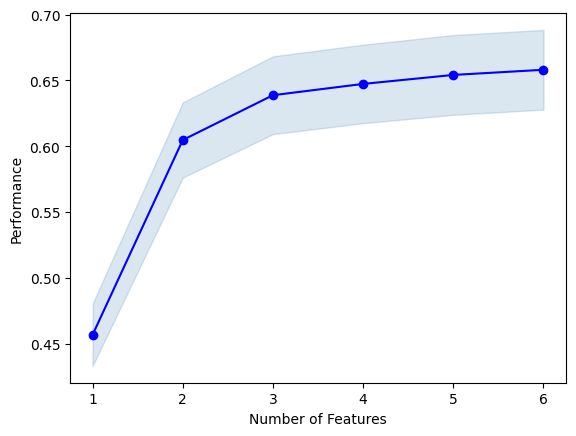

In [211]:
plot_sequential_feature_selection(metric_dict=feature_selection.get_metric_dict(),kind='ci')

In [212]:
light=model.fit(X_train_selected,y_train)
light.score(X_test_selected,y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] Start training from score 36210.646750


0.7456718307396073

In [ ]:
light.score(X_train_scaled,y_train)

In [ ]:
feature_selection=SelectFromModel(estimator=model)
feature_selection.fit(X_train,y_train)
X_train_fwe=feature_selection.transform(X_train)
X_test_fwe=feature_selection.transform(X_test)

In [ ]:
feature_selection.get_feature_names_out()

In [ ]:
feature_selection.threshold_

In [ ]:
model=LGBMRegressor(learning_rate= 0.3,max_depth=-1,n_estimators= 100,num_leaves=20,random_state=42)
model.fit(X_train_fwe,y_train)
print(model.score(X_test_fwe,y_test))
print(model.score(X_train_fwe,y_train))

In [58]:
knr.score(X_test_scaled,y_test)

0.8850036836417313

In [157]:
df_st.iloc[1731]

Mühərrikin həcmi               2.00
At gücü                         184
Yanacaq növü                  Dizel
Marka                           Kia
Model                       Sorento
Buraxılış ili                  2010
Ban növü            Offroader / SUV
Rəng                     Yaş Asfalt
Yürüş                        172451
Name: 1731, dtype: object

In [167]:
y_pred = knr.predict(X_test_scaled)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.iloc[2]

Actual      27500.00
Predicted   27650.00
Name: 1731, dtype: float64

In [168]:
with open(file = 'reg_model.pickle', mode = 'wb') as pickled_model:
    pickle.dump(obj = knr, file = pickled_model)